In [ ]:
!pip install keras

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
print(os.listdir(data_dir))

['roses', 'dandelion', 'sunflowers', 'tulips', 'daisy', 'LICENSE.txt']


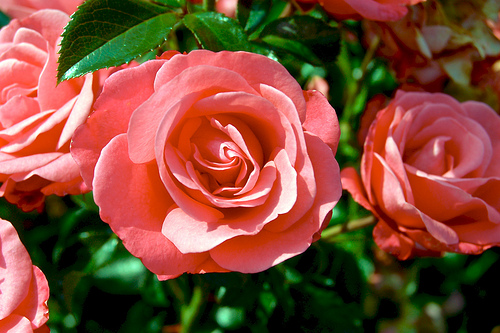

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

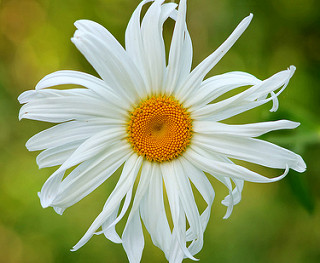

In [ ]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[2]))

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


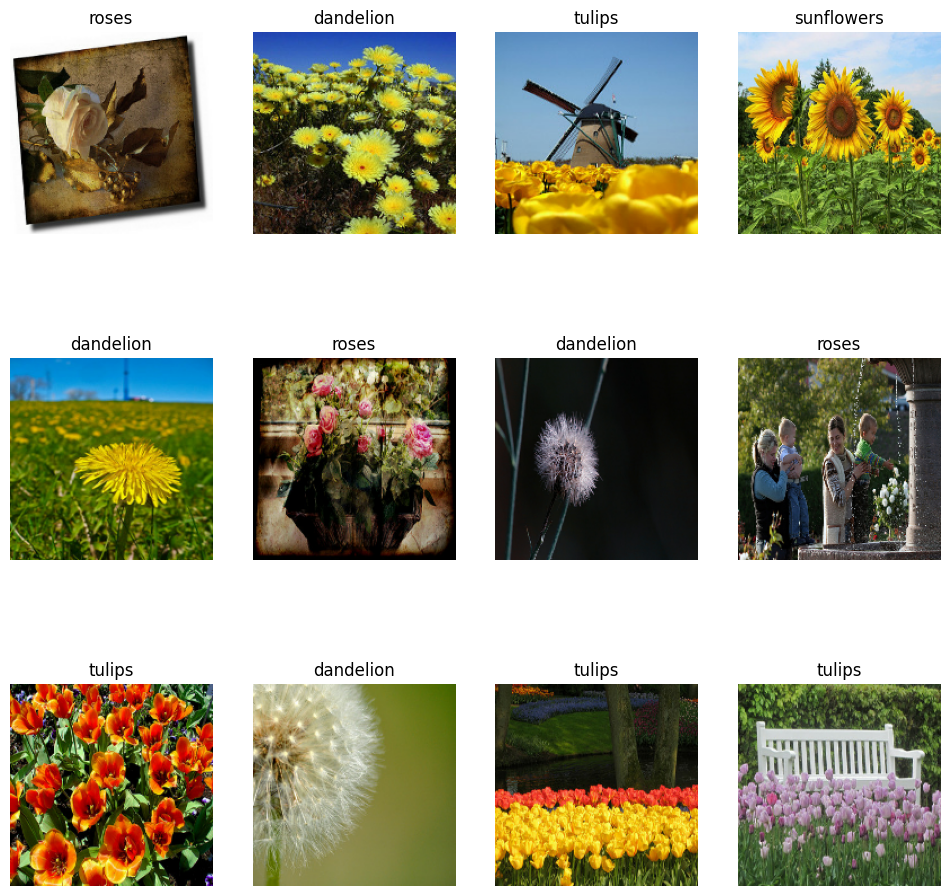

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

num_classes = len(class_names)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


92/92 [==============================] - 103s 1s/step - loss: 1.3563 - accuracy: 0.4223 - val_loss: 1.0854 - val_accuracy: 0.5381
Epoch 2/15
92/92 [==============================] - 102s 1s/step - loss: 0.9988 - accuracy: 0.6063 - val_loss: 0.9915 - val_accuracy: 0.6022
Epoch 3/15
92/92 [==============================] - 107s 1s/step - loss: 0.8194 - accuracy: 0.6921 - val_loss: 0.9183 - val_accuracy: 0.6349
Epoch 4/15
92/92 [==============================] - 100s 1s/step - loss: 0.6104 - accuracy: 0.7715 - val_loss: 0.9023 - val_accuracy: 0.6649
Epoch 5/15
92/92 [==============================] - 97s 1s/step - loss: 0.4051 - accuracy: 0.8542 - val_loss: 1.0638 - val_accuracy: 0.6512
Epoch 6/15
92/92 [==============================] - 100s 1s/step - loss: 0.2487 - accuracy: 0.9135 - val_loss: 1.2453 - val_accuracy: 0.6444
Epoch 7/15
92/92 [==============================] - 100s 1s/step - loss: 0.1315 - accuracy: 0.9591 - val_loss: 1.3359 - val_accuracy: 0.6853
Epoch 8/15
92/92 [=======

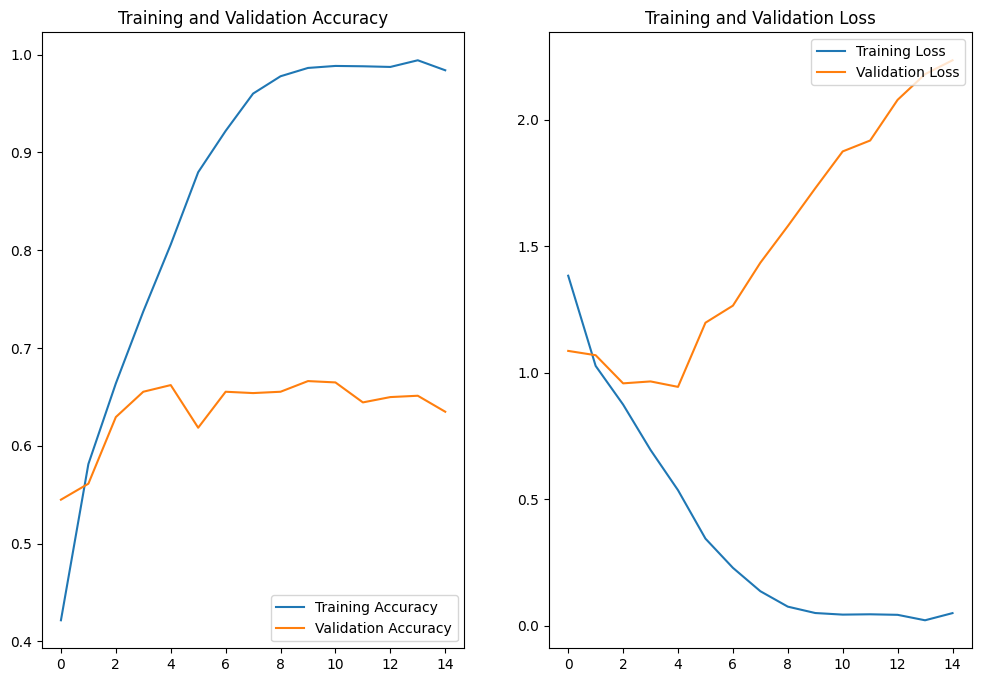

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def resize_image(input_image):
    img = PIL.Image.fromarray(input_image)
    resized_img = img.resize((180, 180))
    resized_array = np.array(resized_img)
    return resized_array

In [ ]:
def predict_input_image(img):
  img=resize_image(img)
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
!pip install gradio


In [ ]:
!pip install typing-extensions --upgrade

In [ ]:
!pip install --upgrade typing-extensions

In [ ]:
import gradio as gr

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# label = gr.Label(num_top_classes=5)
# img = gr.Image()

# plt.show(img)
# img = image
# gr.Interface(fn=predict_input_image, inputs=gr.Image(), outputs =gr.Label(num_top_classes=5),live=False).launch(debug='True')
# gr.Interface(fn=predict_input_image, inputs=[gr.Image(), 180],outputs=gr.Label(num_top_classes=5),live=False).launch(debug='True')
gr.Interface(fn=predict_input_image, inputs=gr.Image(),outputs=gr.Label(num_top_classes=5),live=False).launch(debug='True')

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d3f49330fa6f3d363e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 18ms/step
